.323494020557, 7000.323834884797, 7000.324175749054, 7000.324516613329, 7000.324857477627, 7000.325198341947, 7000.32553920628, 7000.32588007063, 7000.326220935001, 7000.326561799395, 7000.326902663808, 7000.327243528237, 7000.327584392687, 7000.327925257155, 7000.328266121642, 7000.3286069861515, 7000.328947850678, 7000.329288715222, 7000.329629579786, 7000.329970444368, 7000.33031130897, 7000.330652173592, 7000.330993038234, 7000.331333902895, 7000.3316747675735, 7000.332015632271, 7000.332356496989, 7000.332697361725, 7000.333038226481, 7000.333379091257, 7000.333719956051, 7000.3340608208655, 7000.334401685696, 7000.334742550549, 7000.335083415419, 7000.335424280308, 7000.335765145222, 7000.336106010148, 7000.336446875095, 7000.33678774006, 7000.337128605046, 7000.3374694700515, 7000.337810335072, 7000.338151200119, 7000.338492065181, 7000.338832930263, 7000.339173795364, 7000.3395146604835, 7000.3398555256235, 7000.34019639078, 7000.340537255957, 7000.340878121155, 7000.3412189863

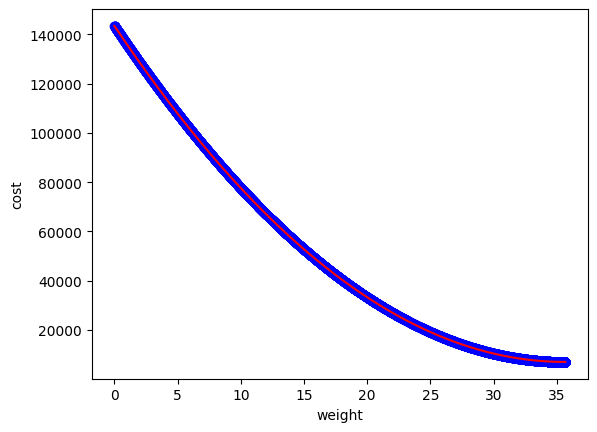

final weight: 35.677818357998255, final bias: -0.5869034087669176
size:5, expected:436, predicted:177.80218838122437
size:7, expected:476, predicted:249.15782509722087
size:12, expected:477, predicted:427.5469168872121
size:13, expected:499, predicted:463.22473524521035
size:14, expected:508, predicted:498.9025536032086
size:15, expected:558, predicted:534.5803719612069
size:16, expected:567, predicted:570.2581903192051
size:18, expected:578, predicted:641.6138270352017
size:19, expected:605, predicted:677.2916453931999
size:20, expected:621, predicted:712.9694637511982


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Lets generate a dataset
x_train = np.sort(np.random.choice(range(1, 21), 10, replace=False)) # feature (size of the house)
y_train = np.sort(np.random.choice(range(300, 901), 10, replace=False))

def compute_cost(X, Y, W, b):
    """
    Compute cost for linear regression model
    Args:
        X -- input data of shape (10, 1)
        Y -- actual output or target of shape (10, 1)
        W -- weight
        b -- bias
    Returns:
        cost -- loss value
    """
    m = X.shape[0]
    cost = 0
    for i in range(m):
        y_hat = W * X[i] + b
        cost += (y_hat - Y[i]) ** 2
    cost = cost / (2 * m)
    return cost

def compute_gradient(X, Y, W, b):
    """
    Compute gradient for linear regression model
    Args:
        X (ndarray (100,)) -- input data of shape (10, 1)
        Y (ndarray (100, )) -- actual output or target of shape (10, 1)
        W (scalar) -- weight
        b (scalar) -- bias
    Returns:
        dW (scalar) -- gradient of loss with respect to W
        db (scalra) -- gradient of loss with respect to b
    """
    m = X.shape[0]
    dW = 0
    db = 0

    for i in range(m):
        y_hat = W * X[i] + b
        dW += (y_hat - Y[i]) * X[i]
        db = y_hat - Y[i]

    dW /= m
    db /= m

    return dW, db

def gradient_descent(X, Y, W, b, alpha, num_iters, cost_function, gradient_function):
    """
    Perform gradient descent to update and fit W and b by minimizing cost

    Args:
        X (ndarray (100,)) -- input data of shape (10, 1)
        Y (ndarray (100,)) -- actual output or target of shape (10, 1)
        W (scalar) -- weight
        b (scalar) -- bias
        alpah (scalar) -- learning rate
        num_iters (scalar) -- number of iterations
        cost_function (func) -- cost function
        gradient_function (func) -- gradient function
    Returns:
        W (scalar) -- updated value of weight
        b (scalar) -- updated value of bias
        cost_history (list) -- history of cost
        var_history (list) -- history of variable
    """
    new_W = W
    new_b = b
    cost_history = []
    var_history = []
    for i in range(num_iters):
        dW, db = gradient_function(X, Y, new_W, new_b)
        new_W = new_W - alpha * dW
        new_b = new_b - alpha * db

        cost = cost_function(X, Y, new_W, new_b)
        cost_history.append(cost)
        var_history.append([new_W, new_b])

    return new_W, new_b, cost_history, var_history

# train the model
W = 0
b = 0
alpha = 1.0e-6
num_iters = 100000
cost_function = compute_cost
gradient_function = compute_gradient
W, b, cost_history, var_history = gradient_descent(x_train, y_train, W, b, alpha, num_iters, cost_function, gradient_function)

# predict
print('cost_history: {}'.format(cost_history))
w_hist = [var[0] for var in var_history]
b_hist = [var[1] for var in var_history]
y_pred = W * x_train + b
plt.scatter(w_hist, cost_history, c='b')
plt.xlabel('weight')
plt.ylabel('cost')
plt.plot(w_hist,cost_history, c='r')
plt.show()

print('final weight: {}, final bias: {}'.format(W, b))
for i in range(x_train.shape[0]):
    y_pred = W * x_train[i] + b
    print('size:{}, expected:{}, predicted:{}'.format(x_train[i], y_train[i], y_pred))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=39a136b1-8191-420f-afab-bb238316f4d7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>